<a href="https://colab.research.google.com/github/annvorosh/GB/blob/Alg_AD/Alg_AD_L08_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание
Можно ли отобрать наиболее значимые признаки с помощью PCA?



1. (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
2. (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Загрузка датасета Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Масштабирование данных
X_ = X.astype(float)
means = X_.mean(axis=0)
X_ -= means
std = np.std(X_, axis=0)
X_ /= std



Реализуем метод главных компонент (PCA) с использованием сингулярного разложения (SVD). В результате применения PCA данные будут трансформированы в пространство меньшей размерности, что позволит визуализировать их в виде двух главных компонент.

In [7]:
# Реализация PCA с использованием SVD
def pca_svd(X, n_components=2):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    W = Vt.T[:, :n_components]
    Z = X.dot(W)
    return Z, W


In [8]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [9]:
# Обучение модели до применения PCA
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_before_pca = accuracy_score(y_test, y_pred)
print(f"Точность до применения PCA: {accuracy_before_pca}")


Точность до применения PCA: 1.0


In [10]:
# Применение PCA к обучающей и тестовой выборкам
X_train_pca, W = pca_svd(X_train, n_components=2)
X_test_pca = X_test.dot(W)

In [11]:
# Обучение модели после применения PCA
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)
print(f"Точность после применения PCA: {accuracy_after_pca}")

Точность после применения PCA: 0.9


Несмотря на небольшое снижение точности после применения PCA, модель все еще демонстрирует высокую точность. Это означает, что применение PCA не сильно ухудшило качество классификации, но существенно уменьшило размерность данных, что может быть полезно для ускорения обучения модели и уменьшения вычислительных затрат.

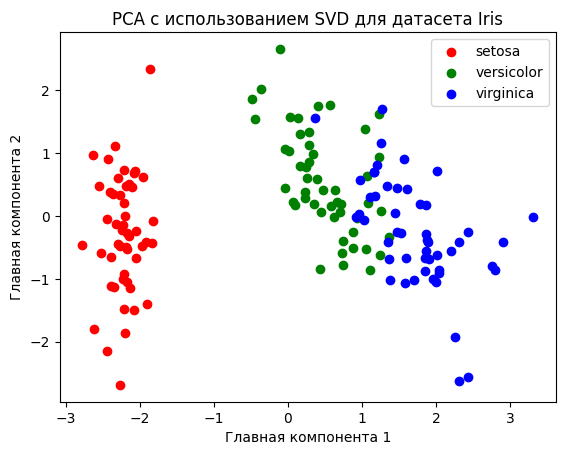

In [12]:
# Визуализация результатов PCA
Z, _ = pca_svd(X_, n_components=2)
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c, label=target_name)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA с использованием SVD для датасета Iris')
plt.legend()
plt.show()

На графике видно, что классы данных (setosa, versicolor и virginica) хорошо разделяются вдоль первых двух главных компонент. Это говорит о том, что эти две компоненты содержат значительную часть информации о классах данных.

In [13]:
# Вывод значимости признаков
feature_importance = np.abs(W)
print("Значимость признаков:\n", feature_importance)

Значимость признаков:
 [[0.5149125  0.39167476]
 [0.28957987 0.91628998]
 [0.58078553 0.03742841]
 [0.56008641 0.07485099]]


Здесь первый столбец соответствует первой главной компоненте, второй - второй. Признаки, которые имеют большие значения, считаются более значимыми.

Таким образом, PCA можно использовать для отбора значимых признаков, особенно если вы хотите уменьшить размерность данных перед обучением моделей машинного обучения.